## Install Libraries

In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install librosa
!pip install tensorflow tensorflow_hub
!pip install ipywidgets

## Import Libraries

In [1]:
from glob import glob
import IPython.display as ipd
from IPython.display import display
import librosa
import librosa.display
import PIL.Image
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

import pandas as pd
import numpy as np

import soundfile
import os
import random

import ipywidgets as widgets

import requests
import io
from io import BytesIO

## Read Audio Files


In [11]:
audio_files = glob('Desktop/Audio/Street-Sounds.mp3')
#/Desktop/Audio/startup-87026.mp3

#Playing an audio file using IPython.display
ipd.Audio(audio_files[0])

## Convert and Display Spectrogram

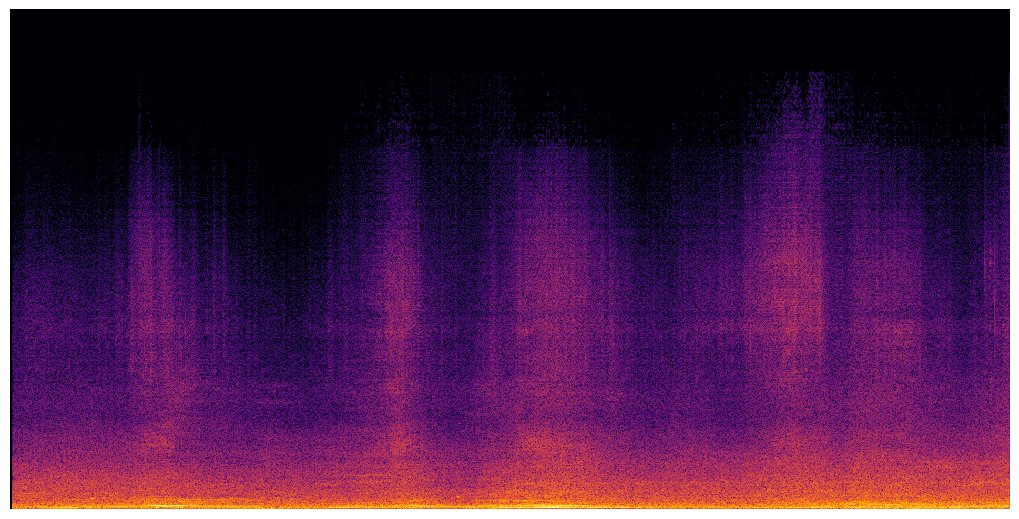

Spectrogram saved as RGB image: Desktop/Audio/Street-Sounds_spectrogram.png


<Figure size 640x480 with 0 Axes>

In [12]:
def audio_to_spectrogram(file_path, save_image=True):

    y, sr = librosa.load(file_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert amplitude to decibels (log scale)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Create a figure without axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_axis_off()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Display spectrogram
    librosa.display.specshow(S_db, sr=sr, cmap='inferno')

    plt.show()

    # Save spectrogram
    img_path = file_path.replace(".mp3", "_spectrogram.png")
    if save_image:
        plt.savefig(img_path, dpi=300, bbox_inches='tight', pad_inches=0)

    plt.close(fig)

    # Convert to RGB format using PIL
    img = Image.open(img_path).convert("RGB")
    img.save(img_path)  # Overwrite with RGB format

    print(f"Spectrogram saved as RGB image: {img_path}")

# Convert the audio files to spectrogram images
for file in audio_files:
    audio_to_spectrogram(file)


## Convert Spectrogram to Art

In [ ]:
def load_image(image_path, image_size=(256, 256)):
    # Load image from path and resize
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def show_image(image, title=''):
    # Remove batch dimension and display image
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
content_image_path = 'Desktop/Audio/short-monster-scream-105026_spectrogram.png'
style_image_path = 'Desktop/Paintings/StarrtNight.jpg'

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
content_image = tf.constant(content_image, dtype=tf.float32)
style_image = tf.constant(style_image, dtype=tf.float32)

stylized_image = hub_model(content_image, style_image)[0]

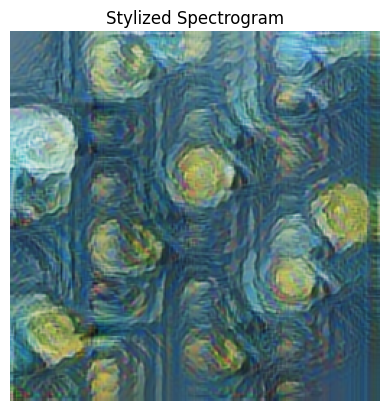

In [ ]:
show_image(stylized_image, title='Stylized Spectrogram')

# Testing Menu

Dropdown(description='Style:', options=('Select a Painting Style', 'Starry Night', 'The Scream', 'The Great Wa…

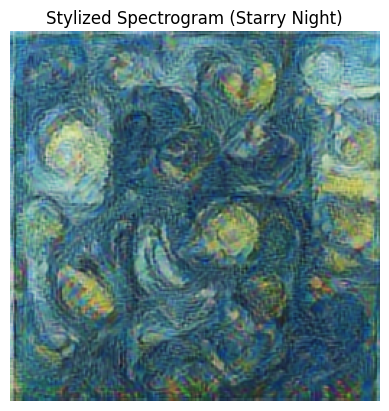

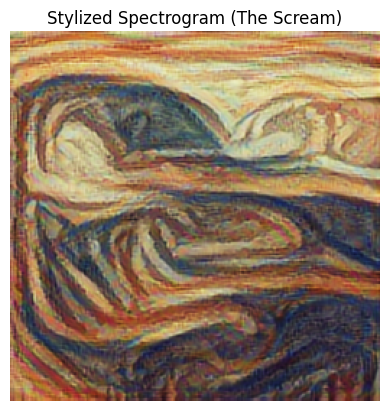

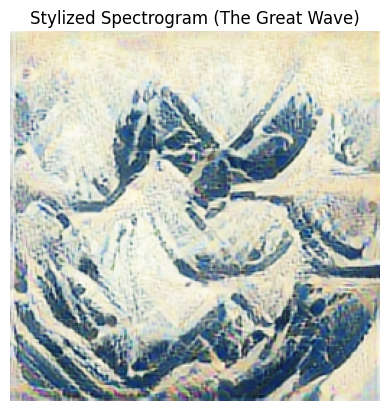

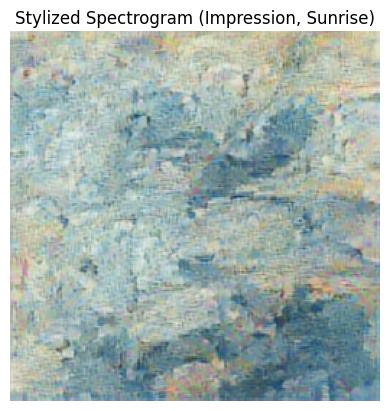

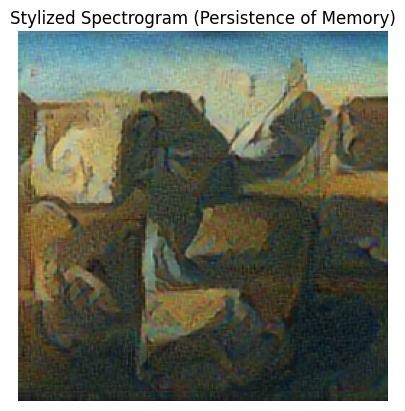

In [13]:
# Define available styles
style_images = {
    "Select a Painting Style": None,
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
}

# Load Image Function
def load_image(image_path, image_size=(256, 256)):
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0

    # Random noise as a creative mistakes
    noise = np.random.normal(0, 0.05, img.shape)
    img = np.clip(img + noise, 0, 1)

    img = np.expand_dims(img, axis=0)
    return img

# Glitch effect: Random pixel shifts
def glitch_effect(image):
    if random.random() < 0.3:  # 30% chance to apply glitch
        shift = random.randint(-10, 10)
        image = np.roll(image, shift, axis=random.choice([1, 2]))  # Shift pixels in random direction
    return image

# Show Image Function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Load style transfer model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu
style_dropdown = widgets.Dropdown(
    options=style_images.keys(),
    description='Style:',
    disabled=False,
)

# Function to apply NST
def apply_style(change):
    style_name = style_dropdown.value
    style_image_path = style_images[style_name]
    style_image = load_image(style_image_path)

    # Apply glitch effect
    style_image = glitch_effect(style_image)

    stylized_image = hub_model(tf.constant(content_image, dtype=tf.float32), tf.constant(style_image, dtype=tf.float32))[0]

    show_image(stylized_image, title=f'Stylized Spectrogram ({style_name})')

# Trigger style application when dropdown changes
style_dropdown.observe(apply_style, names='value')

display(style_dropdown)

# Testing Upload Image

Dropdown(description='Style:', options=('Starry Night', 'The Scream', 'The Great Wave', 'Impression, Sunrise',…

FileUpload(value=(), accept='image/*', description='Upload')

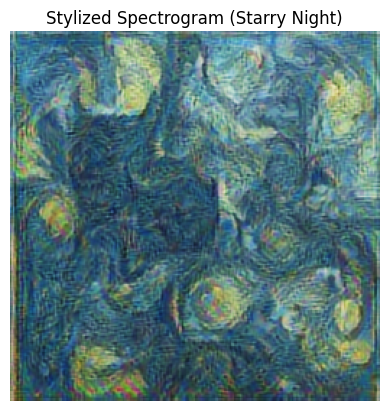

Error loading image: cannot identify image file <_io.BytesIO object at 0x0000020CB8D49C10>
Error: Style image could not be loaded.


In [ ]:
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import PIL.Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
import random
from io import BytesIO

# Define available styles
style_images = {
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
    "Upload Your Own": None,
}

# Load Image Function
def load_image(image_path_or_file, image_size=(256, 256)):
    try:
        if isinstance(image_path_or_file, str):  # If it's a file path
            img = PIL.Image.open(image_path_or_file)
        else:  # If it's a file-like object (for uploaded images)
            img = PIL.Image.open(BytesIO(image_path_or_file))

        img = img.resize(image_size)
        img = np.array(img) / 255.0

        # Introduce random noise as a 'creative mistake'
        noise = np.random.normal(0, 0.05, img.shape)  # Small noise perturbation
        img = np.clip(img + noise, 0, 1)

        img = np.expand_dims(img, axis=0)
        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# Glitch effect: Random pixel shifts
def glitch_effect(image):
    if random.random() < 0.3:  # 30% chance to apply glitch
        shift = random.randint(-10, 10)
        image = np.roll(image, shift, axis=random.choice([1, 2]))  # Shift pixels in random direction
    return image

# Show Image Function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Load style transfer model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu for predefined styles
style_dropdown = widgets.Dropdown(
    options=list(style_images.keys()) + ["Upload Your Own"],  # Add upload option
    description='Style:',
    disabled=False,
)

# File upload widget
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=False
)

uploaded_style_image = None  # Variable to store the uploaded style image

# Function to handle file upload
def handle_upload(change):
    global uploaded_style_image
    uploaded_style_image = next(iter(upload_button.value.values()))['content']
    apply_style(None)  # Automatically apply style after upload

upload_button.observe(handle_upload, names='value')

# Function to apply NST
def apply_style(change):
    global uploaded_style_image

    if style_dropdown.value == "Upload Your Own" and uploaded_style_image:
        style_image = load_image(uploaded_style_image)
    else:
        style_name = style_dropdown.value
        style_image_path = style_images[style_name]
        style_image = load_image(style_image_path)

    if style_image is not None:
        # Apply glitch effect
        style_image = glitch_effect(style_image)

        # Apply Neural Style Transfer
        stylized_image = hub_model(tf.constant(content_image, dtype=tf.float32),
                                   tf.constant(style_image, dtype=tf.float32))[0]

        show_image(stylized_image, title=f'Stylized Spectrogram ({style_dropdown.value})')
    else:
        print("Error: Style image could not be loaded.")

# Trigger style application when dropdown changes
style_dropdown.observe(apply_style, names='value')

# Display widgets
display(style_dropdown, upload_button)

# Apply default style on launch
apply_style(None)


Dropdown(description='Style:', options=('Select a Painting Style', 'Starry Night', 'The Scream', 'The Great Wa…

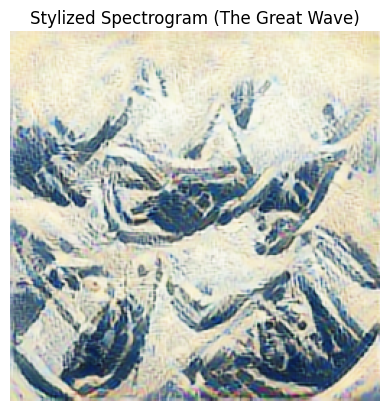

In [ ]:
# Define available styles
style_images = {
    "Select a Painting Style": None,
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
}

# Load Image Function
def load_image(image_path, image_size=(256, 256)):
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0

    # Introduce random noise as a 'creative mistake'
    noise = np.random.normal(0, 0.05, img.shape)  # Small noise perturbation
    img = np.clip(img + noise, 0, 1)

    img = np.expand_dims(img, axis=0)
    return img

# Glitch effect: Random pixel shifts
def glitch_effect(image):
    if random.random() < 0.3:  # 30% chance to apply glitch
        shift = random.randint(-10, 10)
        image = np.roll(image, shift, axis=random.choice([1, 2]))  # Shift pixels in random direction
    return image

# Show Image Function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Load style transfer model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu
style_dropdown = widgets.Dropdown(
    options=style_images.keys(),
    description='Style:',
    disabled=False,
)

# Function to apply NST
def apply_style(change):
    style_name = style_dropdown.value
    style_image_path = style_images[style_name]
    style_image = load_image(style_image_path)

    # Apply glitch effect
    style_image = glitch_effect(style_image)

    stylized_image = hub_model(tf.constant(content_image, dtype=tf.float32), tf.constant(style_image, dtype=tf.float32))[0]

    show_image(stylized_image, title=f'Stylized Spectrogram ({style_name})')

# Trigger style application when dropdown changes
style_dropdown.observe(apply_style, names='value')

# Display dropdown
display(style_dropdown)
